<a href="https://colab.research.google.com/github/specM7/CM2604_ML_CSW_Malindu/blob/main/CM2604_Task1EDA_2425440.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Telco Customer Churn
This notebook performs Exploratory Data Analysis on the dataset:
`WA_Fn-UseC_-Telco-Customer-Churn.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load dataset
csv_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(csv_path)

# Clean TotalCharges (common dataset issue)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Convert SeniorCitizen 0/1 → No/Yes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})

print("Shape:", df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Univariate analysis
### 1A. Univariate Analysis: Catergorical Variables
Applies to: gender, Partner, Dependents, Contract, etc.

In [2]:
cat_cols = df.select_dtypes(include='object').columns

print("=== FREQUENCY TABLES FOR CATEGORICAL VARIABLES ===")
for col in cat_cols:
    print(f"\n[{col}]")
    print(df[col].value_counts())

=== FREQUENCY TABLES FOR CATEGORICAL VARIABLES ===

[customerID]
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

[gender]
gender
Male      3555
Female    3488
Name: count, dtype: int64

[SeniorCitizen]
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

[Partner]
Partner
No     3641
Yes    3402
Name: count, dtype: int64

[Dependents]
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

[PhoneService]
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

[MultipleLines]
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

[InternetService]
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

[OnlineSecurity]
OnlineSecurity
No                     3498
Yes              


gender frequency:
gender
Male      3555
Female    3488
Name: count, dtype: int64


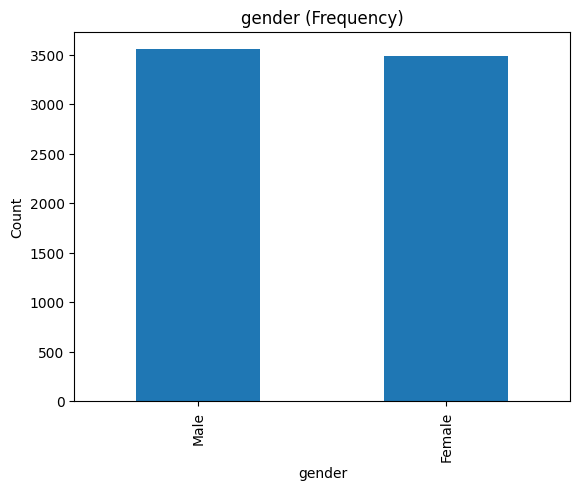


SeniorCitizen frequency:
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


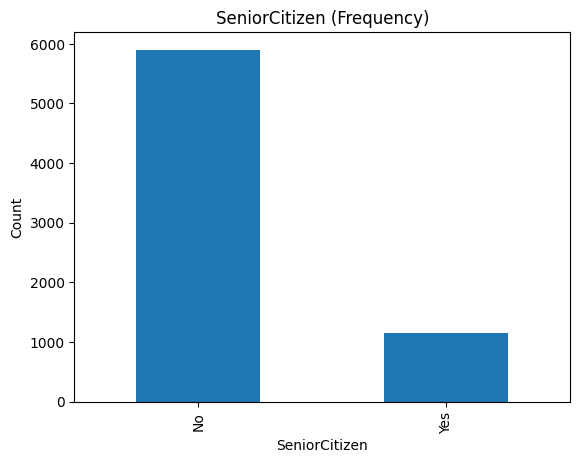


Partner frequency:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


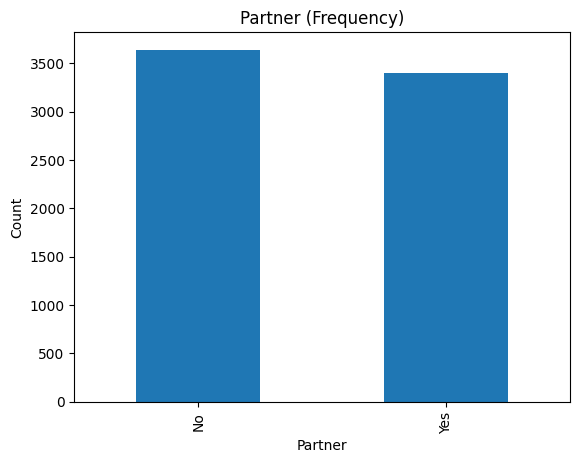


Dependents frequency:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


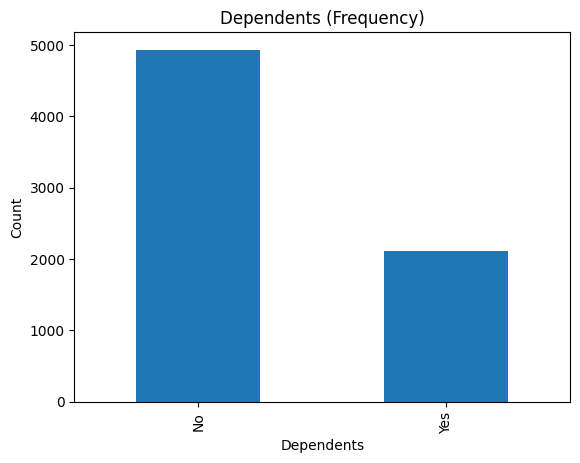


PhoneService frequency:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


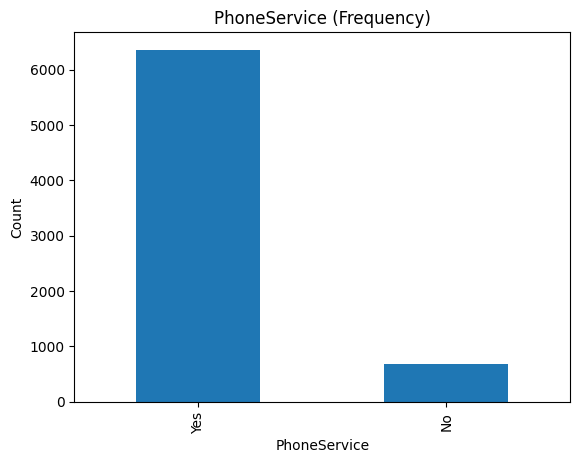


MultipleLines frequency:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


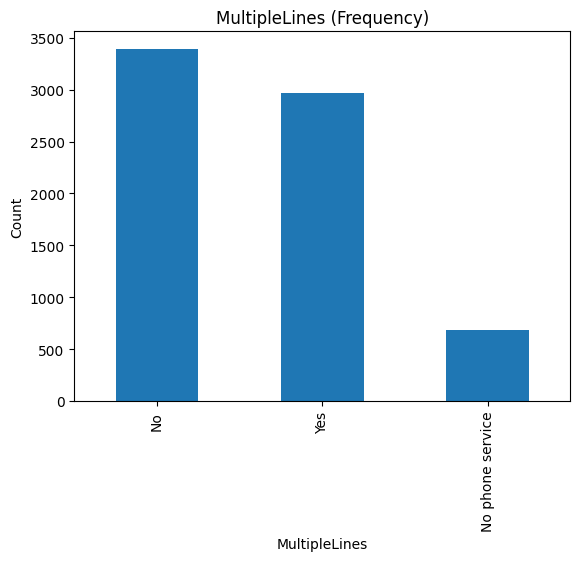


InternetService frequency:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


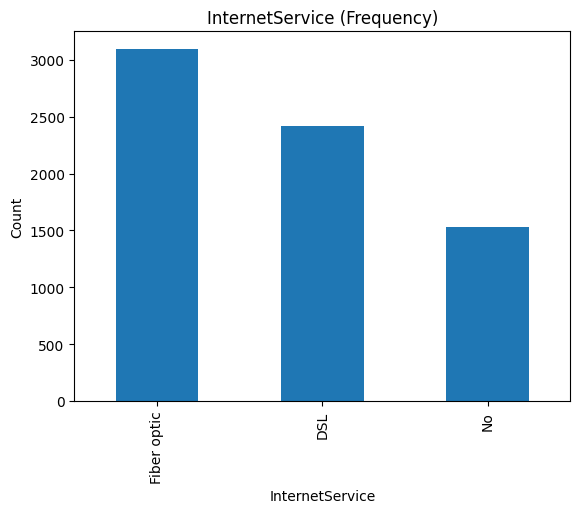


OnlineSecurity frequency:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


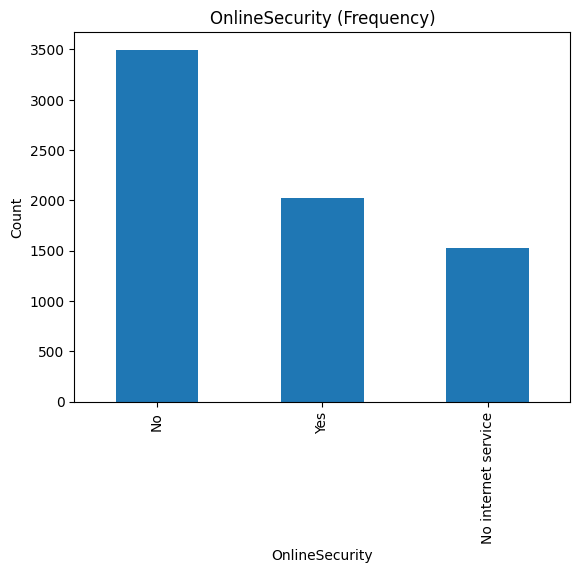


OnlineBackup frequency:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


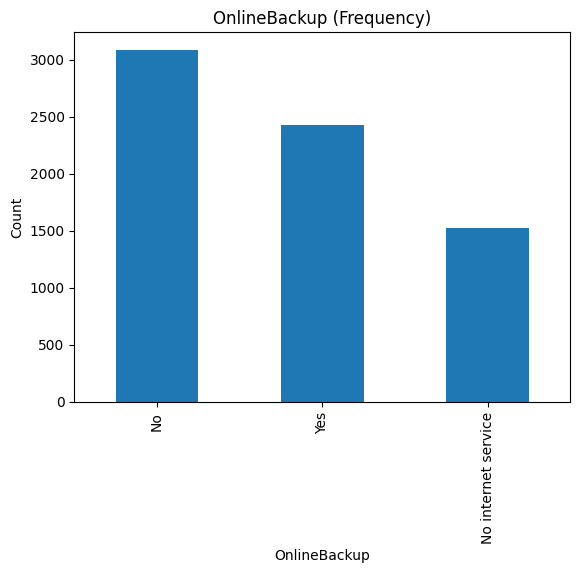


DeviceProtection frequency:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


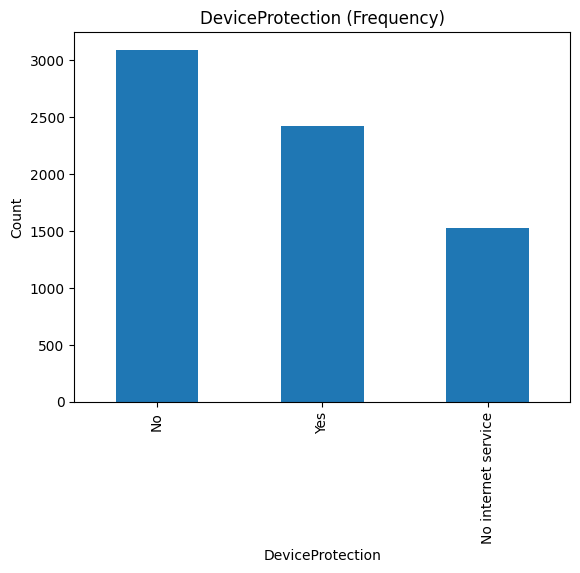


TechSupport frequency:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


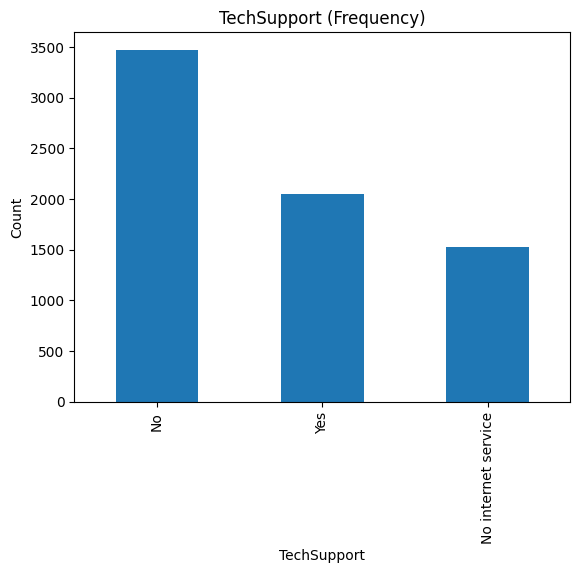


StreamingTV frequency:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


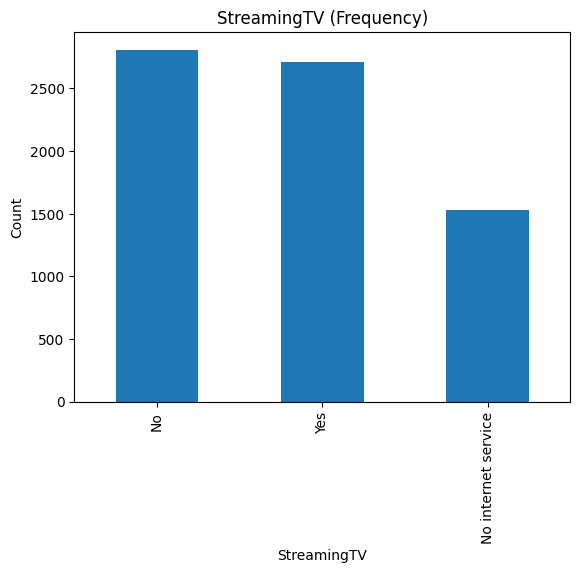


StreamingMovies frequency:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


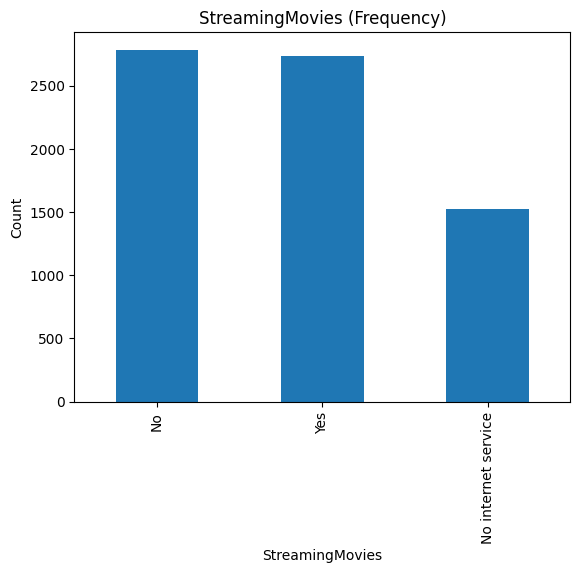


Contract frequency:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


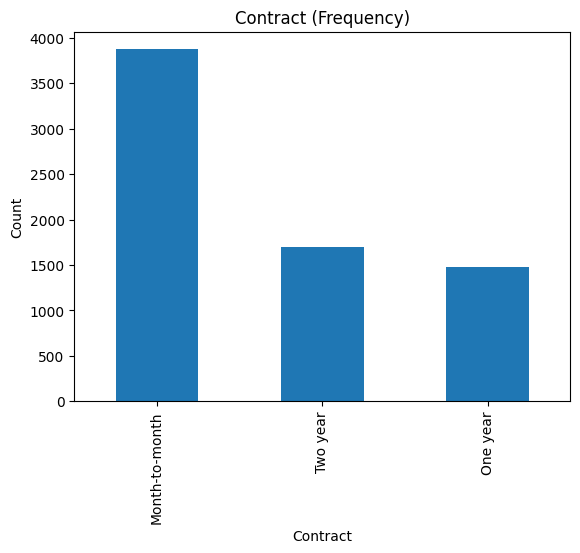


PaperlessBilling frequency:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


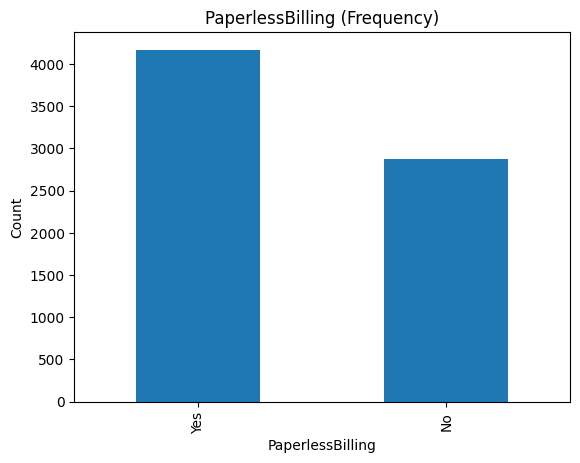


PaymentMethod frequency:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


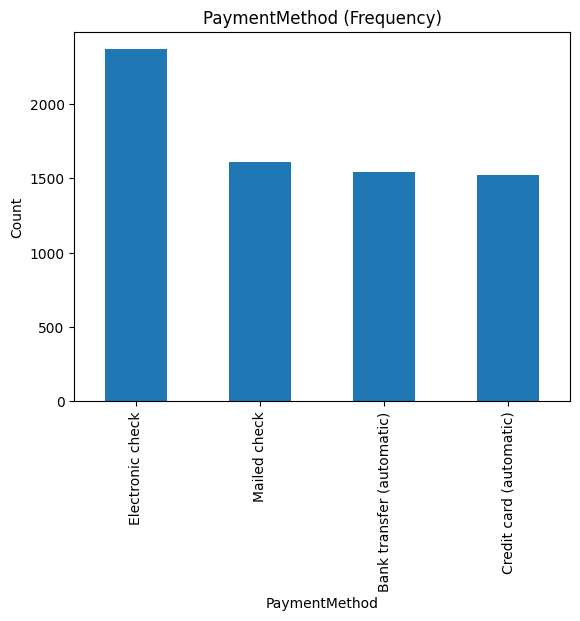


Churn frequency:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


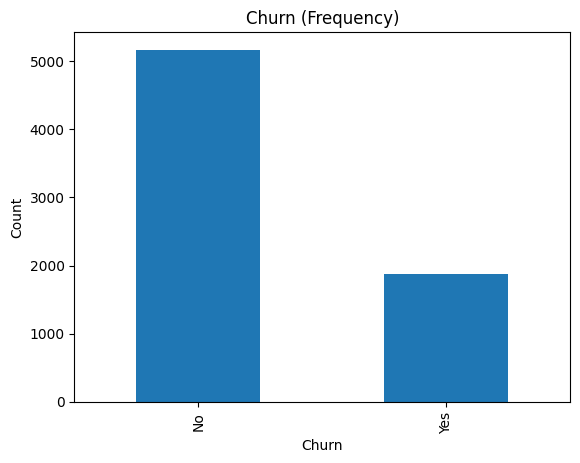

In [3]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  if col=="customerID":
    continue
  print(f"\n{col} frequency:")
  print(df[col].value_counts())
  df[col].value_counts().plot(kind='bar')
  plt.title(f"{col} (Frequency)")
  plt.ylabel("Count")
  plt.show()



### 1B. Univariate Analysis: Numerical Variables
Applies to: tenure, MonthlyCharges, TotalCharges

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


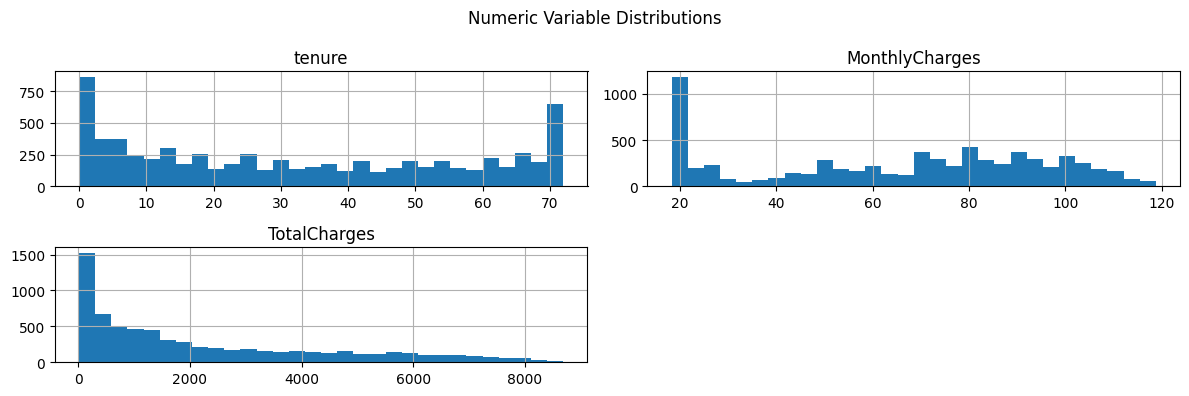

In [4]:
num_cols = df.select_dtypes(include=np.number).columns
display(df[num_cols].describe())

df[num_cols].hist(bins=30, figsize=(12, 4))
plt.suptitle("Numeric Variable Distributions")
plt.tight_layout()
plt.show()


# Multivariate analysis
### 2A. Multivariate Non-graphical (Categorical x Categorical)

##### Contract vs Churn

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


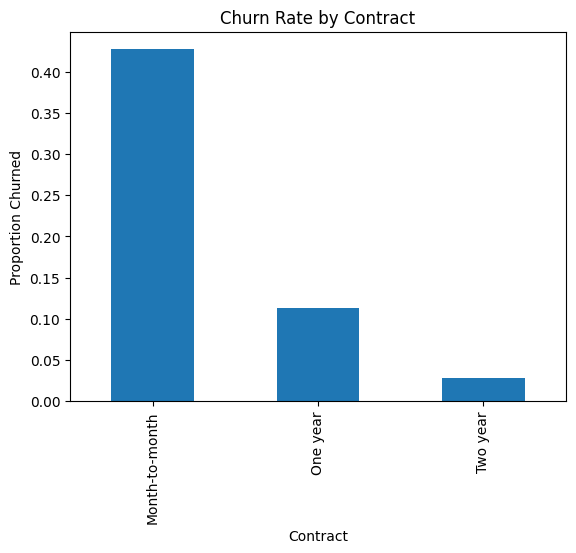

In [5]:
ct_contract = pd.crosstab(df["Contract"], df["Churn"], normalize="index")
print(ct_contract)

ct_contract["Yes"].plot(kind="bar", title="Churn Rate by Contract")
plt.ylabel("Proportion Churned")
plt.show()



##### InternetService vs Churn

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


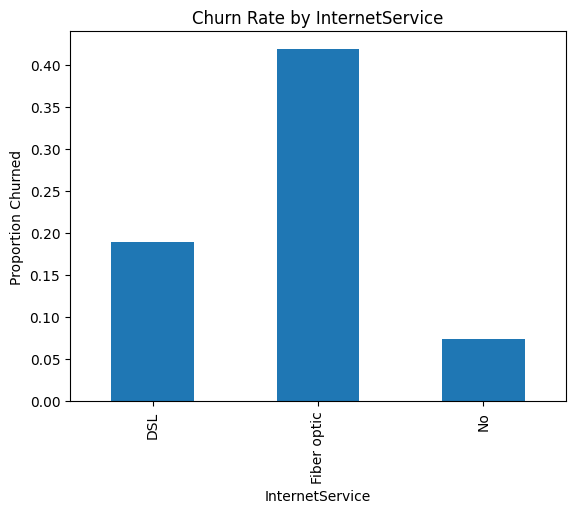

In [6]:
ct_internet = pd.crosstab(df["InternetService"], df["Churn"], normalize="index")
print(ct_internet)

ct_internet["Yes"].plot(kind="bar", title="Churn Rate by InternetService")
plt.ylabel("Proportion Churned")
plt.show()


### 2B. Multivariate Graphical - Numerical x Numerical

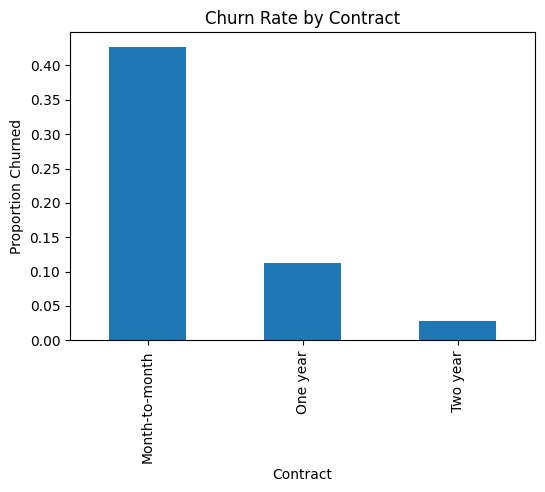

In [7]:
contract_ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
contract_ct['Yes'].plot(kind='bar', figsize=(6, 4))
plt.title("Churn Rate by Contract")
plt.ylabel("Proportion Churned")
plt.show()


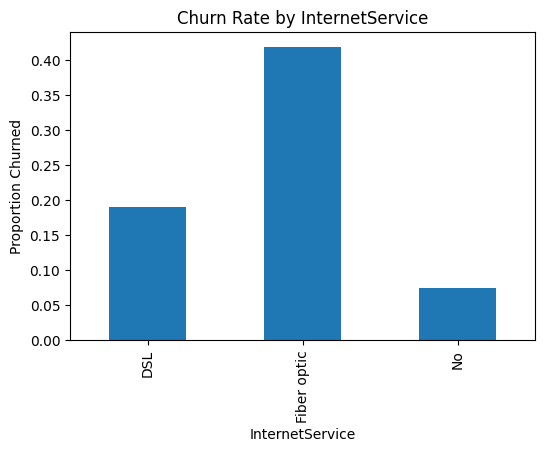

In [8]:
internet_ct = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
internet_ct['Yes'].plot(kind='bar', figsize=(6, 4))
plt.title("Churn Rate by InternetService")
plt.ylabel("Proportion Churned")
plt.show()


### 2C. Multivariate Analysis - Numerical x Numerical

##### Scatter: MonthlyCharges vs TotalCharges

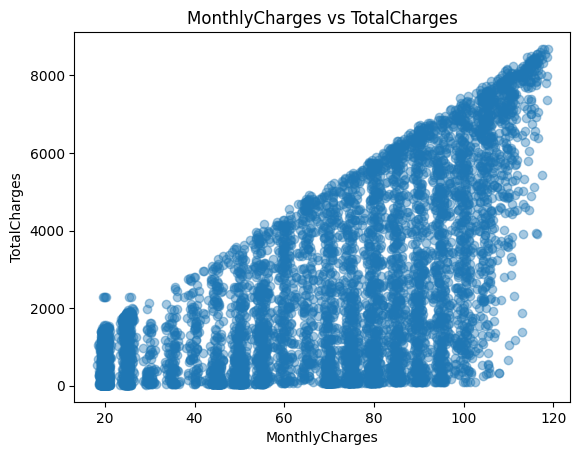

In [9]:
plt.scatter(df["MonthlyCharges"], df["TotalCharges"], alpha=0.4)
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.title("MonthlyCharges vs TotalCharges")
plt.show()



##### Scatter: Tenure vs TotalCharges

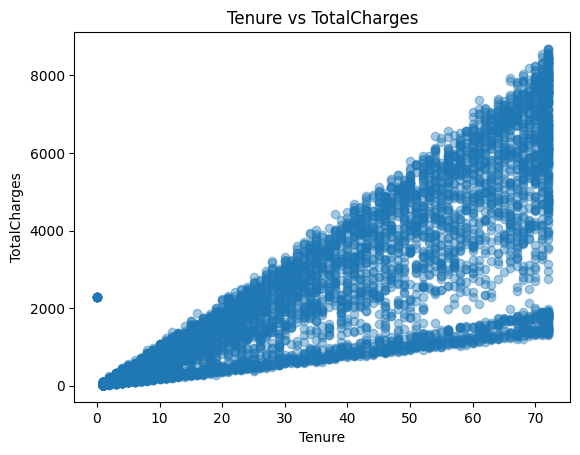

In [10]:
plt.scatter(df["tenure"], df["TotalCharges"], alpha=0.4)
plt.xlabel("Tenure")
plt.ylabel("TotalCharges")
plt.title("Tenure vs TotalCharges")
plt.show()



### 2D. Multivariate Analysis — Numerical × Categorical
##### Boxplots required to compare numeric distributions between churn groups

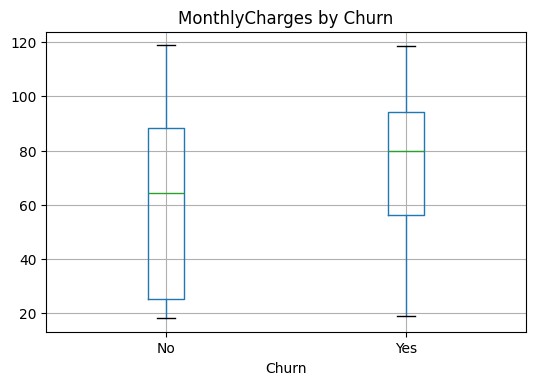

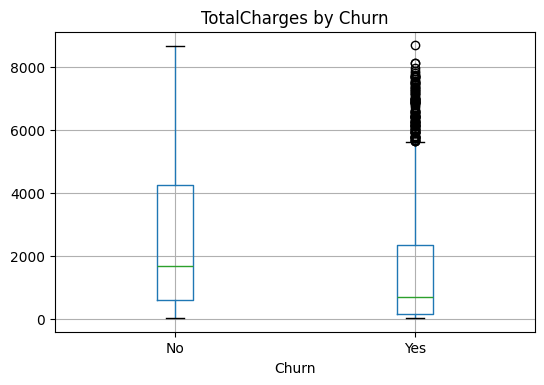

In [11]:
df.boxplot(column="MonthlyCharges", by="Churn", figsize=(6,4))
plt.title("MonthlyCharges by Churn")
plt.suptitle("")
plt.show()

df.boxplot(column="TotalCharges", by="Churn", figsize=(6,4))
plt.title("TotalCharges by Churn")
plt.suptitle("")
plt.show()


### 2E. Multivariate Numerical Analysis — Correlation Heatmap

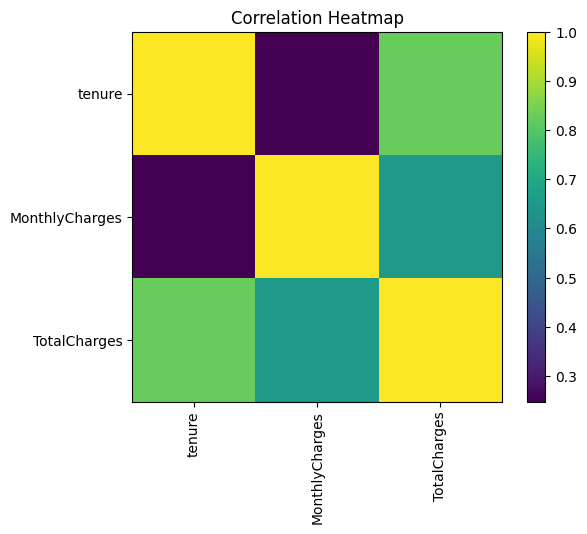

In [12]:
corr = df[num_cols].corr()

plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


##### Churn Counts and propotion

In [13]:
counts = df['Churn'].value_counts(dropna=False)
print("Churn counts:\n", counts)
print("\nProportion churned:", counts.get('Yes', 0) / counts.sum())


Churn counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proportion churned: 0.2653698707936959
